## UMAP the decoder weights of SAEs
We can concat the weights of multiple models and umap them together to try and get a shared projection.


In [6]:
# pip install latentsae pandas numpy umap-learn tqdm matplotlib
from latentsae import Sae
import numpy as np
import pandas as pd
import umap
import tqdm
import os

Triton not installed, using eager implementation of SAE decoder.


In [7]:
device = "cpu"

In [8]:
sae_a = "layers.23"

In [9]:
model_a = Sae.load_from_hub("EleutherAI/sae-llama-3.1-8b-64x", sae_a, device=device)

Fetching 2 files: 100%|██████████| 2/2 [00:00<00:00, 40721.40it/s]


In [10]:
weights = [model_a.W_dec[i].detach().cpu().numpy() for i in range(model_a.W_dec.size(0))]

In [15]:
len(weights)

262144

In [11]:
reducer = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
    metric='cosine',
    random_state=42,
    n_components=2,
    verbose=True,
)

In [12]:
xy = reducer.fit_transform(weights)

/Users/enjalot/code/latent-taxonomy/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


UMAP(angular_rp_forest=True, metric='cosine', n_jobs=1, n_neighbors=100, random_state=42, verbose=True)
Fri Sep  6 11:52:37 2024 Construct fuzzy simplicial set
Fri Sep  6 11:52:38 2024 Finding Nearest Neighbors
Fri Sep  6 11:52:38 2024 Building RP forest with 31 trees
Fri Sep  6 11:54:03 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	 6  /  18
	 7  /  18
	 8  /  18
	 9  /  18
	 10  /  18
	Stopping threshold met -- exiting after 10 iterations
Fri Sep  6 12:58:11 2024 Finished Nearest Neighbor Search
Fri Sep  6 12:58:19 2024 Construct embedding


Epochs completed:   1%|            2/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  10%| █          21/200 [00:12]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:31]

	completed  40  /  200 epochs


Epochs completed:  30%| ███        61/200 [00:48]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [01:08]

	completed  80  /  200 epochs


Epochs completed:  50%| █████      101/200 [01:26]

	completed  100  /  200 epochs


Epochs completed:  60%| ██████     121/200 [01:45]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [02:04]

	completed  140  /  200 epochs


Epochs completed:  80%| ████████   161/200 [02:22]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [02:40]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [02:56]


Fri Sep  6 13:03:01 2024 Finished embedding


In [13]:
min_values = np.min(xy, axis=0)
max_values = np.max(xy, axis=0)

# Scale the embeddings to the range [0, 1]
xy = (xy - min_values) / (max_values - min_values)

# Scale the embeddings to the range [-1, 1]
xy = 2 * xy - 1

POINT SIZE 5 for 262144 points


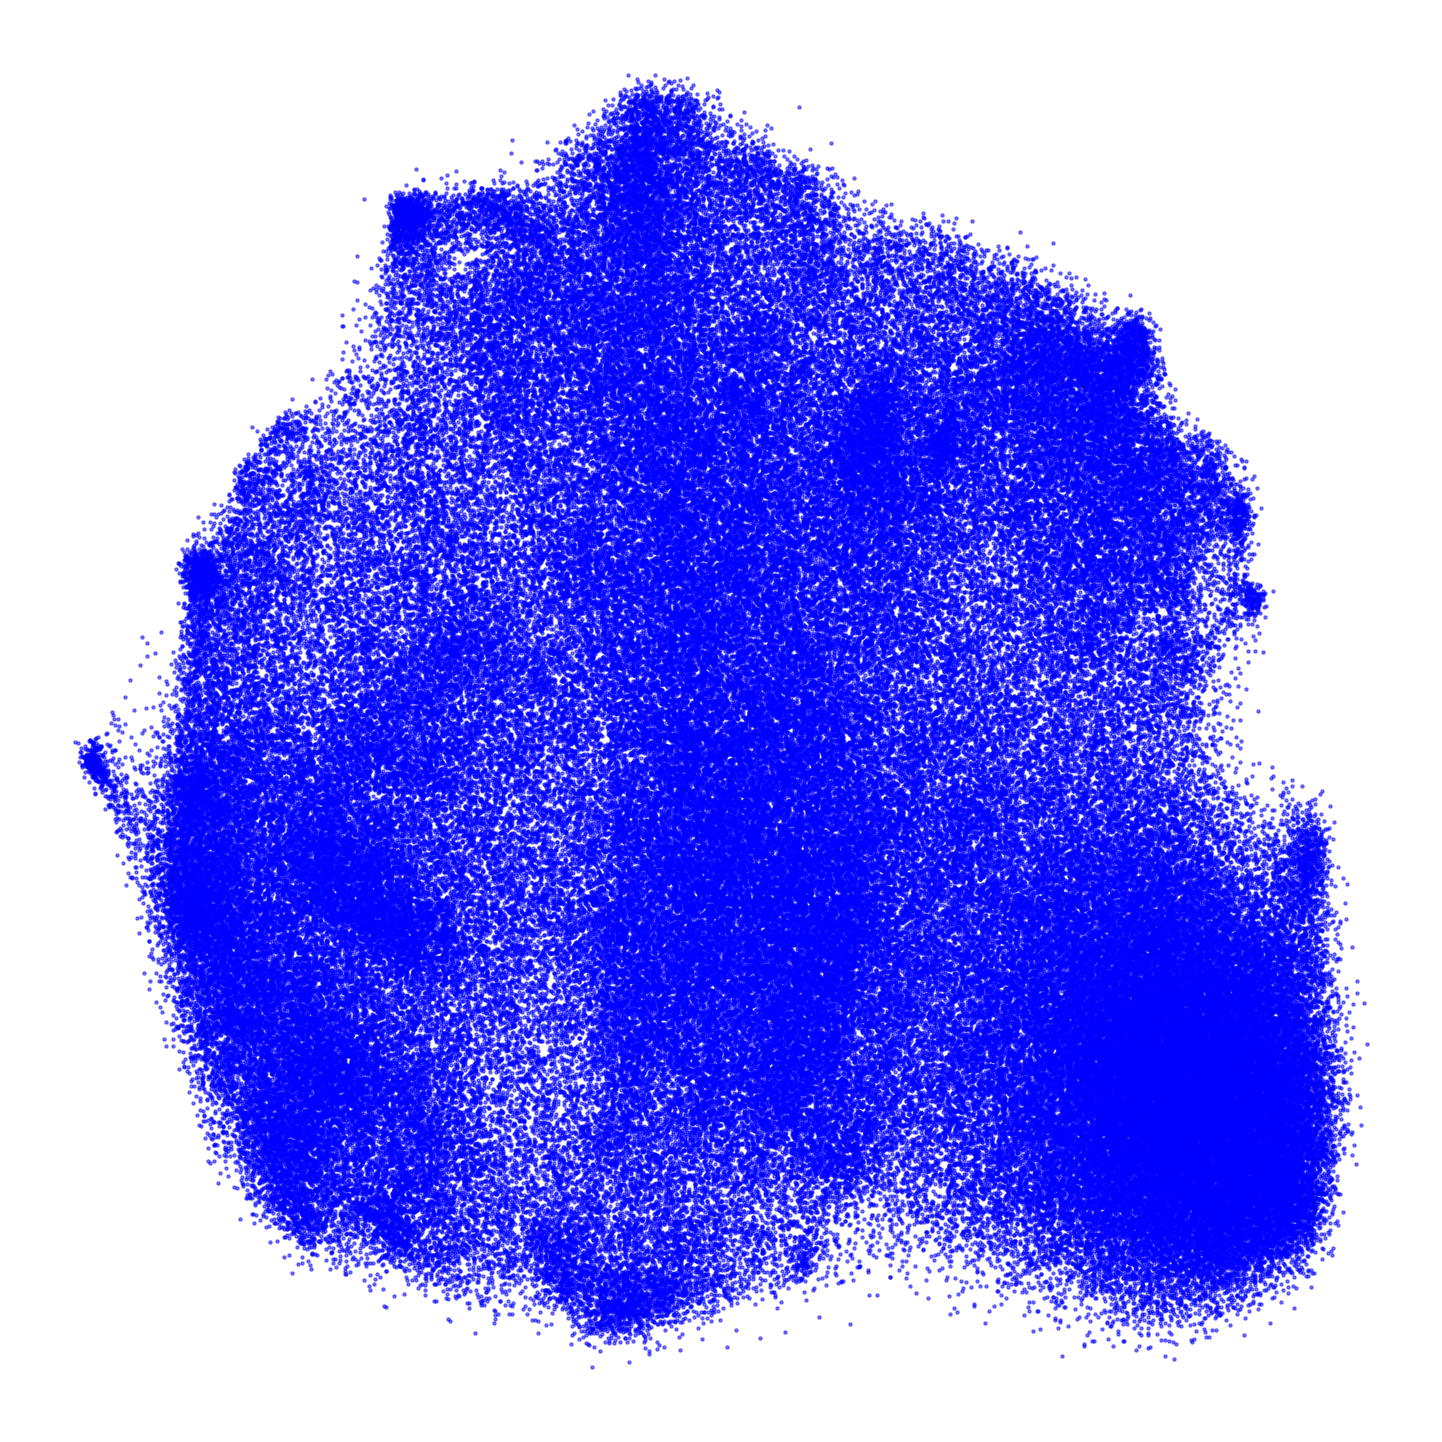

In [14]:
# generate a scatterplot of the umap embeddings and save it to a file
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14.22, 14.22))  # 1024px by 1024px at 72 dpi
point_size = 5
print("POINT SIZE", point_size, "for", xy.shape[0], "points")
plt.scatter(xy[:, 0], xy[:, 1], s=point_size, alpha=0.5, color="blue")
plt.axis('off')  # remove axis
plt.gca().set_position([0, 0, 1, 1])  # remove margins
plt.show()

In [16]:
# df_a = pd.DataFrame(xy[:len(weights_a)], columns=['x', 'y'])
# df_b = pd.DataFrame(xy[len(weights_a):], columns=['x', 'y'])


# if not os.path.exists("data"):
#     os.makedirs("data")
# df_a.to_parquet(f"data/umap-{name_a}.parquet")
# df_b.to_parquet(f"data/umap-{name_b}.parquet")
df = pd.DataFrame(xy, columns=['x', 'y'])
df.to_parquet(f"data/umap-decoder-llama.parquet")

In [9]:
reducer1d = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
    metric='cosine',
    random_state=42,
    n_components=1,
    verbose=True,
)

In [104]:
order = reducer1d.fit_transform(weights)
order.shape

/Users/enjalot/code/latent-taxonomy/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_components=1, n_jobs=1, n_neighbors=100, random_state=42, verbose=True)
Sat Aug 24 14:28:29 2024 Construct fuzzy simplicial set
Sat Aug 24 14:28:29 2024 Finding Nearest Neighbors
Sat Aug 24 14:28:29 2024 Building RP forest with 23 trees
Sat Aug 24 14:28:35 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	Stopping threshold met -- exiting after 7 iterations
Sat Aug 24 14:33:52 2024 Finished Nearest Neighbor Search
Sat Aug 24 14:33:54 2024 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  10%| █          21/200 [00:05]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:13]

	completed  40  /  200 epochs


Epochs completed:  30%| ███        61/200 [00:20]

	completed  60  /  200 epochs


Epochs completed:  40%| ████       81/200 [00:28]

	completed  80  /  200 epochs


Epochs completed:  50%| █████      101/200 [00:36]

	completed  100  /  200 epochs


Epochs completed:  60%| ██████     121/200 [00:43]

	completed  120  /  200 epochs


Epochs completed:  70%| ███████    141/200 [00:51]

	completed  140  /  200 epochs


Epochs completed:  80%| ████████   161/200 [00:59]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [01:07]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [01:14]


Sat Aug 24 14:35:32 2024 Finished embedding


(122880, 1)

In [105]:
dfo_a = pd.DataFrame(order[:len(weights_a)], columns=['order'])
dfo_b = pd.DataFrame(order[len(weights_a):], columns=['order'])


if not os.path.exists("data"):
    os.makedirs("data")
dfo_a.to_parquet(f"data/1d-order-{name_a}.parquet")
dfo_b.to_parquet(f"data/1d-order-{name_b}.parquet")

In [10]:
order_a = reducer1d.fit_transform(weights_a)
order_a.shape

/Users/enjalot/code/latent-taxonomy/venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_components=1, n_jobs=1, n_neighbors=100, random_state=42, verbose=True)
Mon Aug 26 21:24:05 2024 Construct fuzzy simplicial set
Mon Aug 26 21:24:05 2024 Finding Nearest Neighbors
Mon Aug 26 21:24:05 2024 Building RP forest with 13 trees


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Mon Aug 26 21:24:06 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Mon Aug 26 21:25:06 2024 Finished Nearest Neighbor Search
Mon Aug 26 21:25:07 2024 Construct embedding


Epochs completed:   4%| ▍          8/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▏         23/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        43/200 [00:03]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       63/200 [00:05]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▏      83/200 [00:06]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▎     105/200 [00:08]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    123/200 [00:10]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▏   143/200 [00:11]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▏  163/200 [00:13]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 183/200 [00:15]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:16]


Mon Aug 26 21:25:26 2024 Finished embedding


(24576, 1)

In [11]:
dfo_a = pd.DataFrame(order_a, columns=['order'])
if not os.path.exists("data"):
    os.makedirs("data")
dfo_a.to_parquet(f"data/1d-order-{name_a}-2.parquet")